In [1]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
## function to skip printing of max_iter warnings

import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
plt.style.use("Solarize_Light2")

In [2]:
churn_data = pd.read_csv('/home/elliot/PycharmProjects/CSC 495 - Telecom Customer Churn/Datasets/telecom_churn_Processed.csv')

X = churn_data.drop('Churn', axis=1)
y = churn_data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 42)

sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [3]:
grad_boost = GradientBoostingClassifier()

grad_boost.fit(X_train_sc, y_train)

y_pred_grad = grad_boost.predict(X_test_sc)
y_pred_grad_train = grad_boost.predict(X_train_sc)

grad_as = metrics.accuracy_score(y_test, y_pred_grad)
grad_as_train = metrics.accuracy_score(y_train, y_pred_grad_train)

print(f"Accuracy score of test data : {grad_as}")
print(f"Accuracy score of train data : {grad_as_train}")

Accuracy score of test data : 0.7979319258940112
Accuracy score of train data : 0.8295478666949693


<AxesSubplot:>

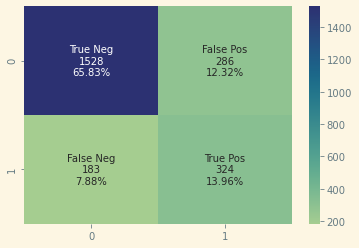

In [4]:
cf_matrix = metrics.confusion_matrix(y_pred_grad, y_test)
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = [f"{value}" for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='crest')

In [5]:
print(metrics.classification_report(y_test, y_pred_grad))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1711
           1       0.64      0.53      0.58       610

    accuracy                           0.80      2321
   macro avg       0.74      0.71      0.72      2321
weighted avg       0.79      0.80      0.79      2321



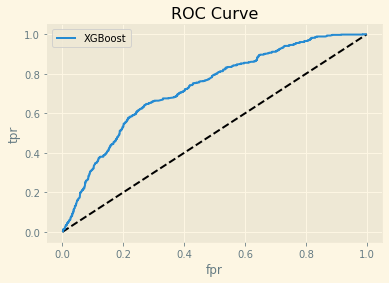

In [6]:
y_proba = grad_boost.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'XGBoost')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.legend();

In [7]:
parameters_grad = {'learning_rate' : [0.01, 0.03, 0.05, 0.1], 'max_depth' : [1, 4, 6], 'n_estimators' : [100, 300, 400, 600, 800]}

grad_grid = GridSearchCV(GradientBoostingClassifier(), parameters_grad, cv = 5, scoring = 'f1')


In [8]:
grad_grid_ = GradientBoostingClassifier(n_estimators = 600, max_depth = 1, learning_rate = .1)

grad_grid_.fit(X_train_sc, y_train)

y_pred_grad_grid = grad_grid_.predict(X_test_sc)
y_pred_grad_grid_train = grad_grid_.predict(X_train_sc)

grad_grid_as = metrics.accuracy_score(y_test, y_pred_grad_grid)
grad_grid_as_train = metrics.accuracy_score(y_train, y_pred_grad_grid_train)

print(f"Accuracy score of test data : {grad_grid_as}")
print(f"Accuracy score of train data : {grad_grid_as_train}")


Accuracy score of test data : 0.8005170185264971
Accuracy score of train data : 0.8136276798981108


<AxesSubplot:>

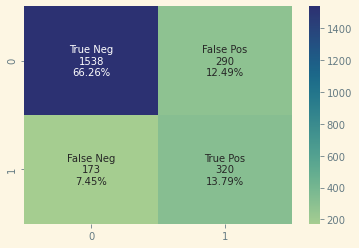

In [9]:
cf_matrix = metrics.confusion_matrix(y_pred_grad_grid, y_test)
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = [f"{value}" for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='crest')

In [10]:
print(metrics.classification_report(y_test, y_pred_grad_grid))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1711
           1       0.65      0.52      0.58       610

    accuracy                           0.80      2321
   macro avg       0.75      0.71      0.72      2321
weighted avg       0.79      0.80      0.79      2321



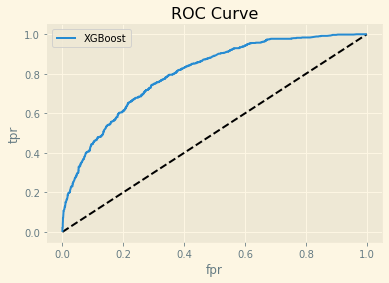

In [11]:
y_proba = grad_grid_.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'XGBoost')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.legend();

In [12]:
k = 5
kf = KFold(n_splits=k, random_state=None)

result = cross_val_score(grad_grid_ ,X_train_sc, y_train, cv = kf)
mean = round(result.mean()*100, 2)
stdv = round(result.std()*100, 2)
range = [round(mean-stdv, 2), round(mean+stdv ,2)]

print("Avg accuracy: {}% +/- {}%\n range: {}".format(mean, stdv, range))

Avg accuracy: 80.28% +/- 1.78%
 range: [78.5, 82.06]
